In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Minimos cuadrados

Supongamos que tenemos un conjunto de $n$ datos $(X, Y)$, donde $Y$ es un vector de $n$ observaciones $y^{[i]}$, y $X$ es una matriz con $n$ filas y $m$ columnas. La $i$-ésima fila contiene las $m$ características del dato $x^{[i]}$. Queremos hacer un modelo $f(x, \beta)$, el cual nos permita conocer el valor de un $x$ desconocido, suponiendo que proviene de la misma distribución del conjunto de datos $(X, Y)$. Además, queremos que el modelo pueda ser "ajustado" a partir de un vector de parámetros $\beta$. El objetivo es encontar el vector de parámetros $\beta$ que mejor se ajuste a los datos. Esto es, para un $x^[i]$ del conjunto de datos, queremos minimizar la diferencia $r_i$ entre el valor $f(x^{[i]}, \beta)$ arrojado por el modelo y las observaciones reales $y^{[i]}$:

$$r^{[i]} = y^{[i]} - f(x^{[i]}, \beta)$$

El método de mínimos cuadrados encuentra el $\beta$ óptimo minimizando la suma de los residuos al cuadrado:

$$S = \sum_{i = 1}^n (r^{[i]})^2$$

Definamos el modelo $f(x, \beta)$ como un modelo lineal de la siguiente forma:

$$f(x, \beta) = \beta_0 + x_1\beta_1 + ... + x_n\beta_n.$$

Para escribir la definición del modelo de manera matricial, añadamos una entrada extra a cada vector de características, de tal manera que $x^{[i]} = [1, x^{[i]}_1, ..., x^{[i]}_n]$. Con esto, el producto matricial $X\beta$ corresponde a un vector de $n$ entradas, tal que en la $i$-ésima entrada se encuentra el valor de $f(x^{[i]}, \beta)$. Notemos que la suma $S$ de residuos cuadráticos se interpreta como la suma de las entradas de $Y - X\beta$ al cuadrado. Esto precisamente la diferencia euclidiana entre el vector $Y$ y el vector $X$ al cuadrado. 

$$S = ||Y - X\beta ||_2^2,$$

y de esta forma el objetivo es entonces encontrar un $\beta$ que minimice tal diferencia. El vector $X\beta$ se encuentra en el espacio columna de $X$, de lo que se sigue que debemos $X\beta$ debe ser la proyección ortogonal de $Y$ sobre el espacio columna de $X$, para que la distancia de $X\beta$ a $Y$ sea mínima. En otras palabras, $Y - X\beta$ debe ser ortogonal al espacio columna de $X$. En símbolos

$$X^T(Y - X\beta) = 0.$$

Operando esta expresión para despejar $\beta$ obtenemos

$$X^TY - X^TX\beta = 0$$

$$X^TX\beta  = X^TY$$

Suponiendo que $X^TX$ es invertible, tenemos que

$$\beta = (X^TX)^{-1}X^TY.$$

La anterior se conoce como la ecuación normal de mínimos cuadrados, por lo que podemos obtener una solución única para el problema de minimización, siempre que $(X^TX)$ sea invertible. Si $X$ fuese invertible, entonces podríamos encontrar una solución tal que $||Y - X\beta ||_2^2 = 0$, pero esto raramente sucede. 



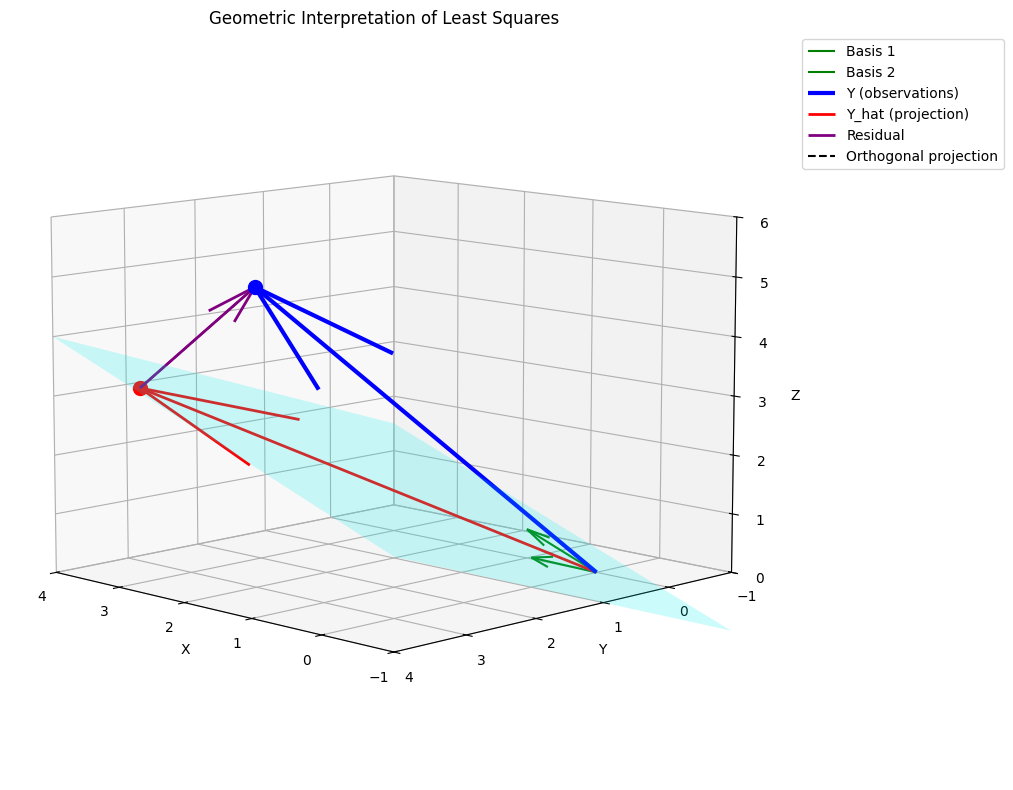

Vector Y: [2 3 5]
Projected vector Y_hat: [2.83333333 3.83333333 3.33333333]
Residual vector: [-0.83333333 -0.83333333  1.66666667]

Verification:
Residual should be orthogonal to both basis vectors:
Dot product with basis 1: -6.661338147750939e-16
Dot product with basis 2: -2.220446049250313e-16


In [ ]:


# Generate data
Y = np.array([2, 3, 5])  # Vector of observations (3D)
# Matrix X with columns spanning a less tilted plane in 3D space
X = np.array([
    [1, 0],    # First column [1,0,0.5]
    [0, 1],    # Second column [0,1,0.5]
    [0.5, 0.5] # Smaller z-components for less tilt
])

# Calculate least squares solution
XtX_inv = np.linalg.inv(X.T @ X)
projection_matrix = X @ XtX_inv @ X.T
Y_hat = projection_matrix @ Y  # Projection of Y onto column space of X

# Calculate residual
residual = Y - Y_hat

# Create a grid of points for the plane
u = np.linspace(-1, 4, 20)  # Parameter 1
v = np.linspace(-1, 4, 20)  # Parameter 2
u_grid, v_grid = np.meshgrid(u, v)

# Calculate the plane points using the column vectors of X
x_grid = u_grid * X[0,0] + v_grid * X[0,1]
y_grid = u_grid * X[1,0] + v_grid * X[1,1]
z_grid = u_grid * X[2,0] + v_grid * X[2,1]

# Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw the plane (column space of X)
surf = ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.2, color='cyan')

# Origin
origin = np.zeros(3)

# Draw basis vectors (columns of X)
ax.quiver(*origin, *X[:, 0], color='green', label='Basis 1', length=1.0)
ax.quiver(*origin, *X[:, 1], color='green', label='Basis 2', length=1.0)

# Draw vector Y
ax.quiver(*origin, *Y, color='blue', label='Y (observations)', 
          linewidth=3, normalize=False)
ax.scatter(*Y, color='blue', s=100)

# Draw projection Y_hat
ax.quiver(*origin, *Y_hat, color='red', label='Y_hat (projection)', 
          linewidth=2, normalize=False)
ax.scatter(*Y_hat, color='red', s=100)

# Draw residual vector
ax.quiver(*Y_hat, *residual, color='purple', label='Residual', 
          linewidth=2, normalize=False)

# Draw projection line
ax.plot([Y[0], Y_hat[0]], [Y[1], Y_hat[1]], [Y[2], Y_hat[2]], 
        'k--', label='Orthogonal projection')

# Configure plot
ax.set_xlim([-1, 4])
ax.set_ylim([-1, 4])
ax.set_zlim([0, 6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Geometric Interpretation of Least Squares')

# Adjust viewing angle to face the plane
ax.view_init(elev=10, azim=135)  # Changed these values for better view

# Add legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Vector Y:", Y)
print("Projected vector Y_hat:", Y_hat)
print("Residual vector:", residual)
print("\nVerification:")
print("Residual should be orthogonal to both basis vectors:")
print("Dot product with basis 1:", np.dot(residual, X[:,0]))
print("Dot product with basis 2:", np.dot(residual, X[:,1]))